In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import mplhep as hep
hep.style.use("CMS")

In [12]:
fileNames = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/genMatched/GluGlu*.parquet")
print(len(fileNames), "files available")
df = pd.read_parquet(fileNames)
df = df[df.correctChoice==True]

11 files available


In [13]:
df.columns
inL = len(df)
df = df[df.dijet_mass < 200]
fiL = len(df)
print(fiL/inL)

0.9999508647798742


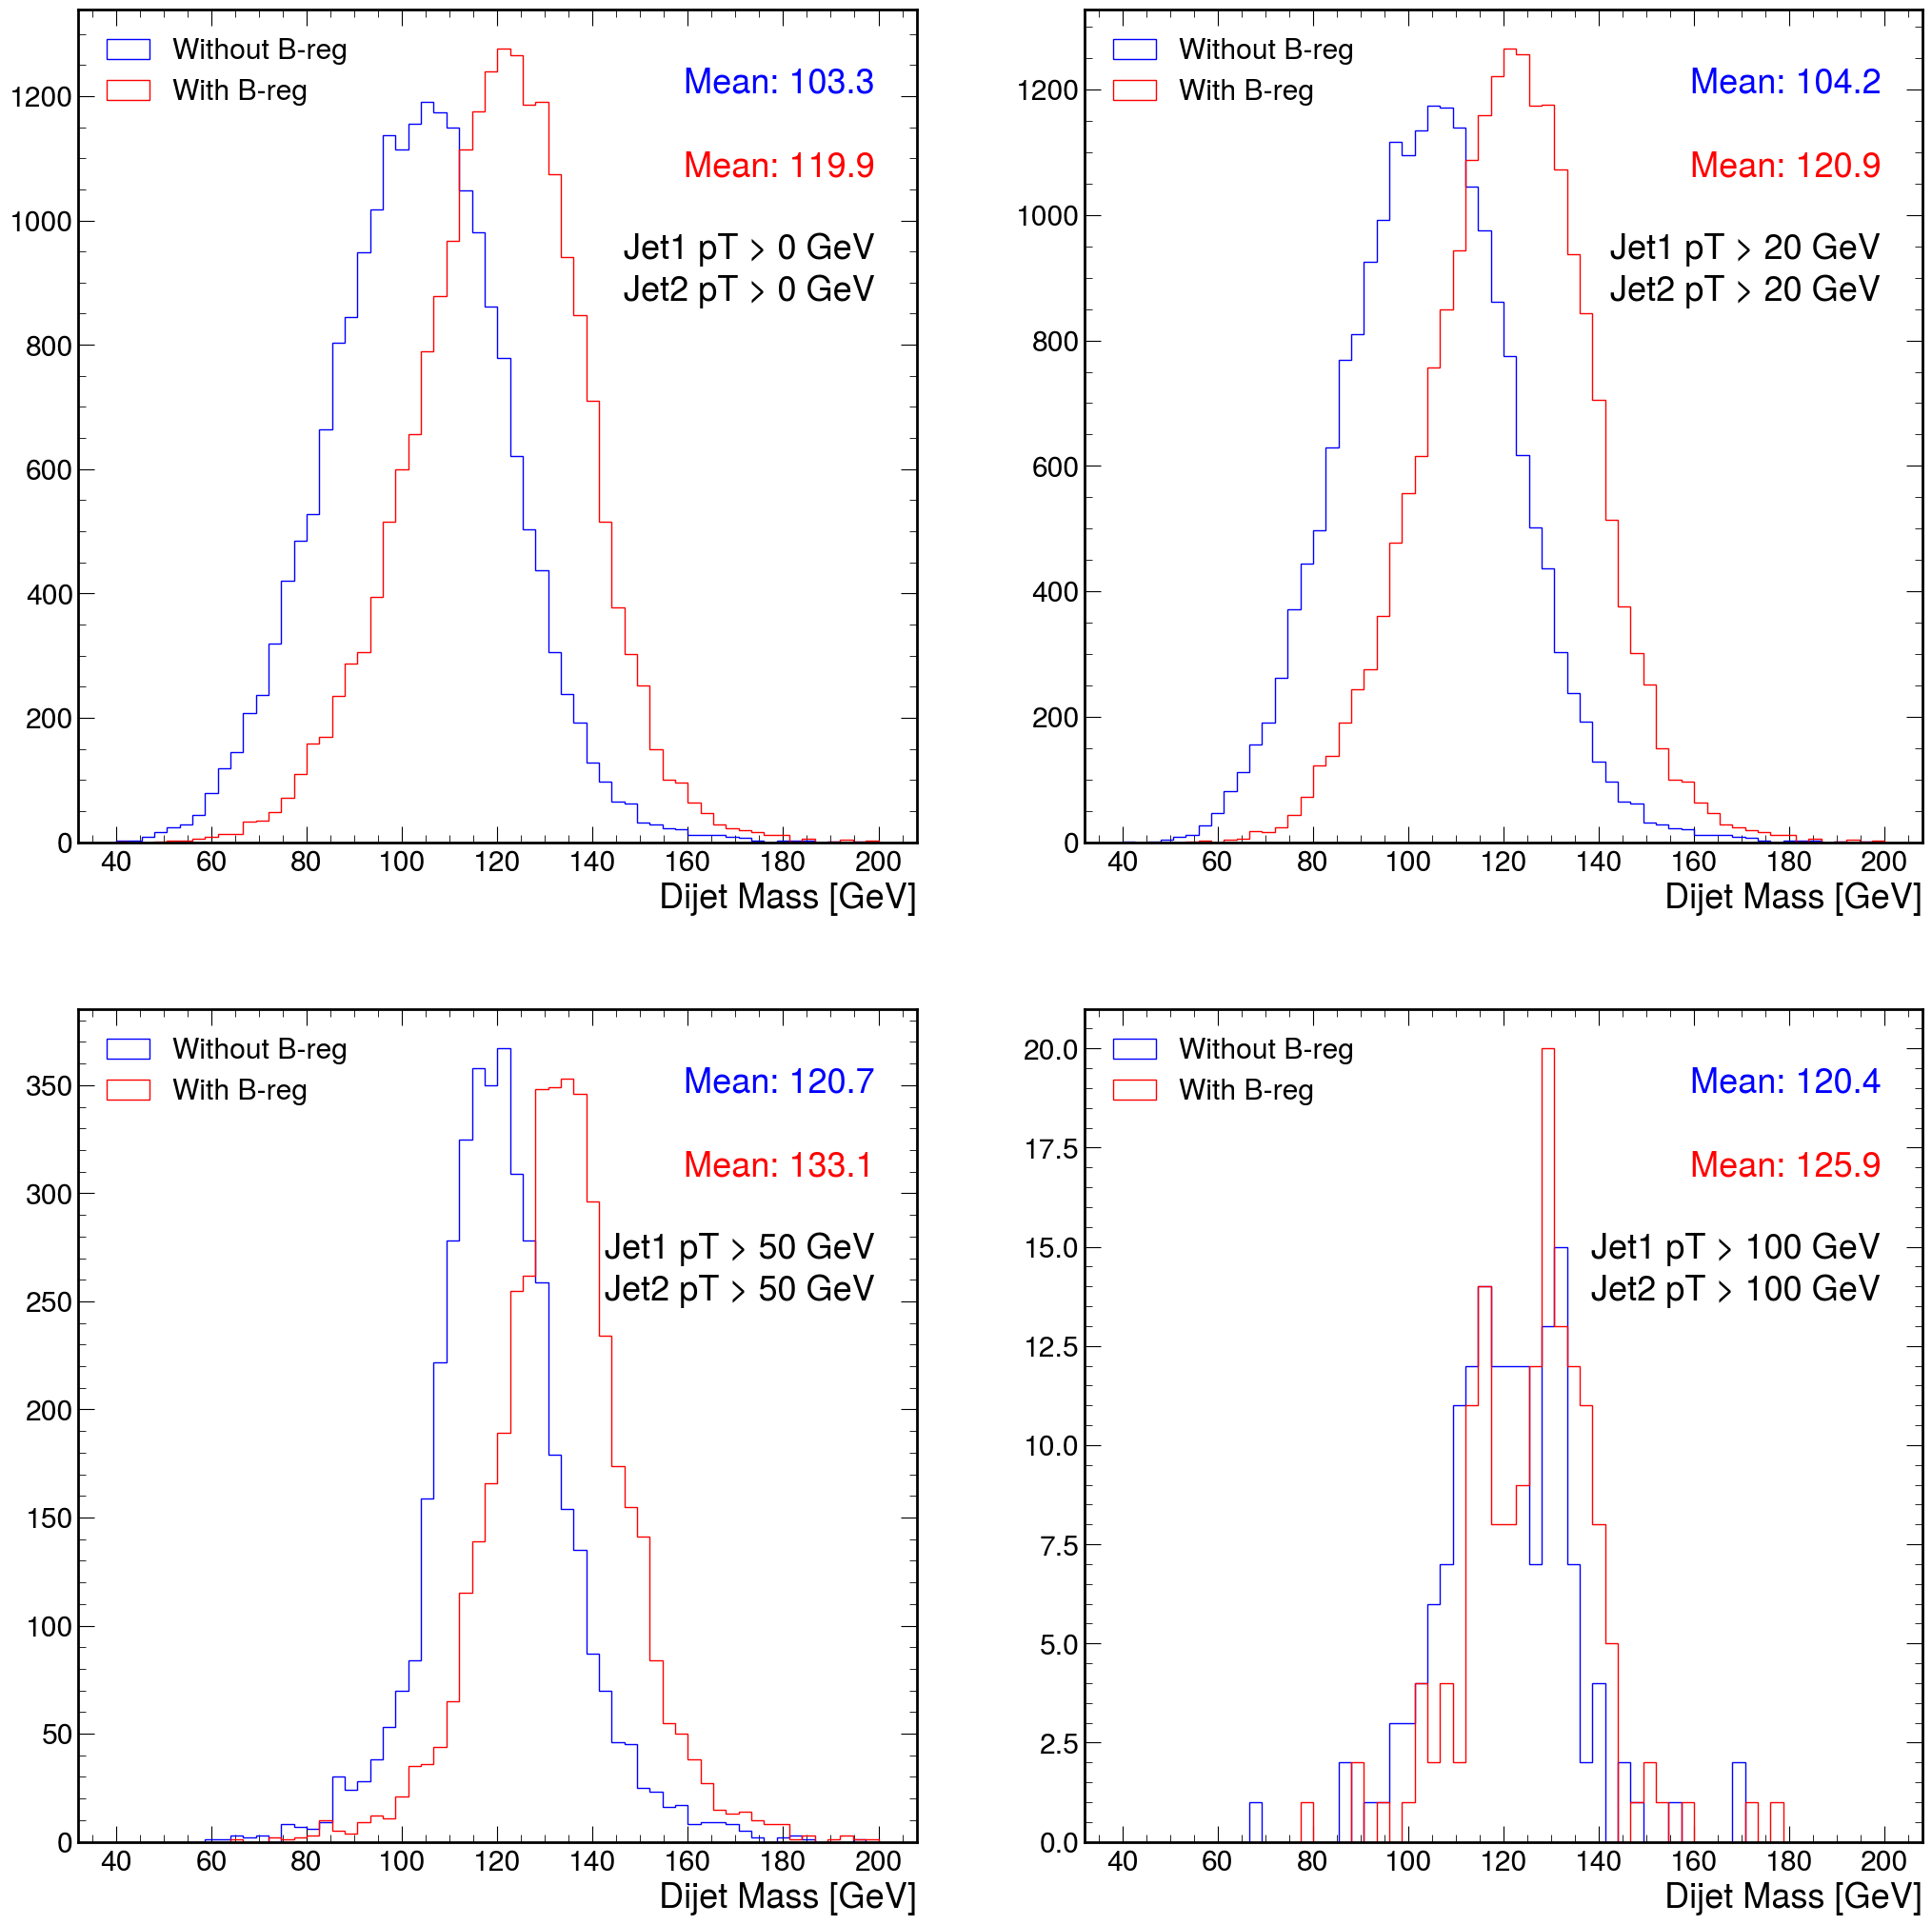

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(25,25))
bins=np.linspace(40, 200, 61)

# inclusive
m = (df.jet1_pt>0) & (df.jet2_pt>0) & (df.correctChoice==True)
ax[0,0].hist(df.dijet_mass[m], bins=bins, histtype=u'step', color='blue', label="Without B-reg")
ax[0,0].text(x=0.95, y=0.9, s="Mean: %.1f"%df.dijet_mass[m].mean(), transform=ax[0,0].transAxes, ha='right', color='blue')
ax[0,0].hist(df.dijetCorr_mass[m], bins=bins, histtype=u'step', color='red', label="With B-reg")
ax[0,0].text(x=0.95, y=0.8, s="Mean: %.1f"%df.dijetCorr_mass[m].mean(), transform=ax[0,0].transAxes, ha='right', color='red')
ax[0,0].text(x=0.95, y=0.7, s="Jet1 pT > 0 GeV", transform=ax[0,0].transAxes, ha='right')
ax[0,0].text(x=0.95, y=0.65, s="Jet2 pT > 0 GeV", transform=ax[0,0].transAxes, ha='right')
ax[0,0].set_xlabel("Dijet Mass [GeV]")
ax[0,0].legend()
# jets > 20
m = (df.jet1_pt>20) & (df.jet2_pt>20)
ax[0,1].hist(df.dijet_mass[m], bins=bins, histtype=u'step', color='blue', label="Without B-reg")
ax[0,1].text(x=0.95, y=0.9, s="Mean: %.1f"%df.dijet_mass[m].mean(), transform=ax[0,1].transAxes, ha='right', color='blue')
ax[0,1].hist(df.dijetCorr_mass[m], bins=bins, histtype=u'step', color='red', label="With B-reg")
ax[0,1].text(x=0.95, y=0.8, s="Mean: %.1f"%df.dijetCorr_mass[m].mean(), transform=ax[0,1].transAxes, ha='right', color='red')
ax[0,1].text(x=0.95, y=0.7, s="Jet1 pT > 20 GeV", transform=ax[0,1].transAxes, ha='right')
ax[0,1].text(x=0.95, y=0.65, s="Jet2 pT > 20 GeV", transform=ax[0,1].transAxes, ha='right')
ax[0,1].set_xlabel("Dijet Mass [GeV]")
ax[0,1].legend()

# jets > 50
m = (df.jet1_pt>50) & (df.jet2_pt>50)
ax[1,0].hist(df.dijet_mass[m], bins=bins, histtype=u'step', color='blue', label="Without B-reg")
ax[1,0].text(x=0.95, y=0.9, s="Mean: %.1f"%df.dijet_mass[m].mean(), transform=ax[1,0].transAxes, ha='right', color='blue')
ax[1,0].hist(df.dijetCorr_mass[m], bins=bins, histtype=u'step', color='red', label="With B-reg")
ax[1,0].text(x=0.95, y=0.8, s="Mean: %.1f"%df.dijetCorr_mass[m].mean(), transform=ax[1,0].transAxes, ha='right', color='red')
ax[1,0].text(x=0.95, y=0.7, s="Jet1 pT > 50 GeV", transform=ax[1,0].transAxes, ha='right')
ax[1,0].text(x=0.95, y=0.65, s="Jet2 pT > 50 GeV", transform=ax[1,0].transAxes, ha='right')
ax[1,0].set_xlabel("Dijet Mass [GeV]")
ax[1,0].legend()


# jets > 100
m = (df.jet1_pt>100) & (df.jet2_pt>100)
ax[1,1].hist(df.dijet_mass[m], bins=bins, histtype=u'step', color='blue', label="Without B-reg")
ax[1,1].text(x=0.95, y=0.9, s="Mean: %.1f"%df.dijet_mass[m].mean(), transform=ax[1,1].transAxes, ha='right', color='blue')
ax[1,1].hist(df.dijetCorr_mass[m], bins=bins, histtype=u'step', color='red', label="With B-reg")
ax[1,1].text(x=0.95, y=0.8, s="Mean: %.1f"%df.dijetCorr_mass[m].mean(), transform=ax[1,1].transAxes, ha='right', color='red')
ax[1,1].text(x=0.95, y=0.7, s="Jet1 pT > 100 GeV", transform=ax[1,1].transAxes, ha='right')
ax[1,1].text(x=0.95, y=0.65, s="Jet2 pT > 100 GeV", transform=ax[1,1].transAxes, ha='right')
ax[1,1].set_xlabel("Dijet Mass [GeV]")
ax[1,1].legend()

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200.]


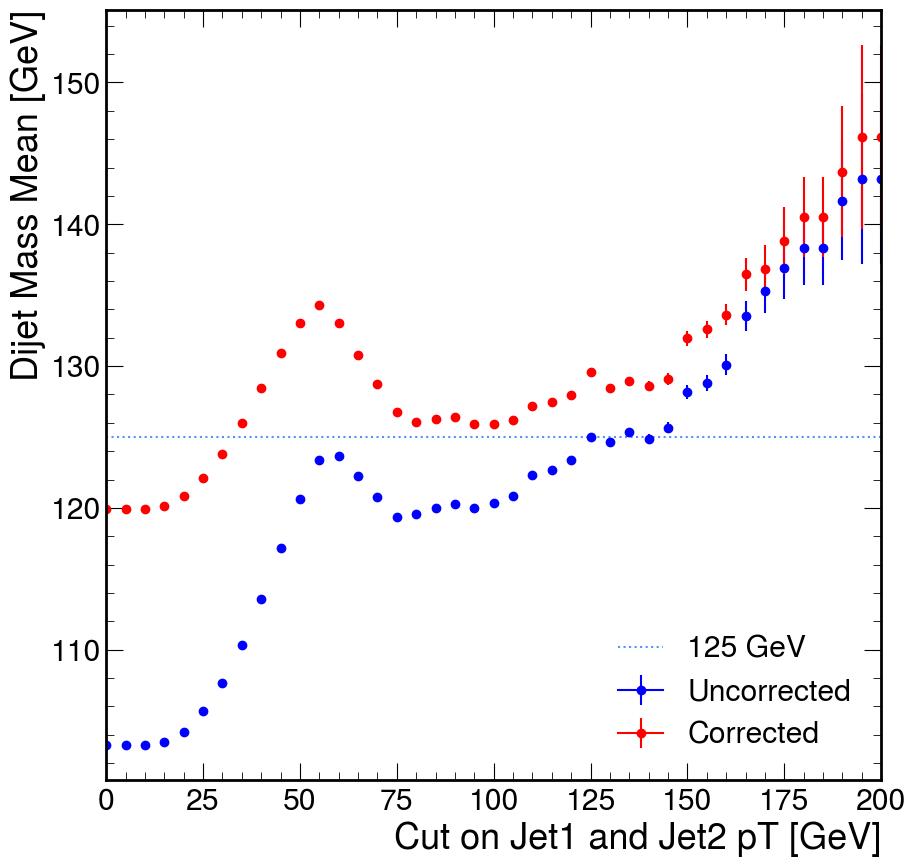

In [15]:
thresholds = np.linspace(0, 200, 41)
print(thresholds)
fig, ax = plt.subplots(1, 1)
for id, t in enumerate(thresholds):
    m = (df.jet1_pt>t) & (df.jet2_pt>t)
    ax.errorbar(x=thresholds[id], y=df.dijet_mass[m].mean(), yerr = df.dijet_mass[m].std()/len(df[m]), marker='o', color='blue', label="Uncorrected")
    ax.errorbar(x=thresholds[id], y=df.dijetCorr_mass[m].mean(), yerr = df.dijetCorr_mass[m].std()/len(df[m]), marker='o', color='red', label='Corrected')
ax.hlines(y=125, xmin=thresholds[0], xmax=thresholds[-1], linestyle='dotted', label='125 GeV')
handles, labels = plt.gca().get_legend_handles_labels()
ax.set_ylabel("Dijet Mass Mean [GeV]")
ax.set_xlabel("Cut on Jet1 and Jet2 pT [GeV]")
ax.set_xlim(thresholds[0], thresholds[-1])
# Only keep the first 2 labels
ax.legend(handles[:3], labels[:3], loc='lower right')